# 第7回機械学習レポート
　「SSDSE-社会生活 (SSDSE-D)」から取得した、[都道府県別・男女別の１日の主な行動の平均時刻のデータセット](https://www.nstac.go.jp/use/literacy/ssdse/)を用いて、１日の主な行動の平均時刻は都道府県別に特徴があるのかを分析するために非階層クラスタリングを行う。

# データの読み込み

In [1]:
# モジュールのインポート
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# グラフで日本語を表示する設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

time_usage = pd.read_csv("data/SSDSE-D-2021.csv", encoding="cp932", skiprows=1)
# 元データの確認
time_usage

,男女の別,地域コード,都道府県,推定人口（10歳以上）,0_学習・自己啓発・訓練の総数,1_外国語,11_英語,12_英語以外の外国語,2_商業実務・ビジネス関係(総数),21_パソコンなどの情報処理,...,20_その他,04_通勤・通学（通勤・通学をした人、平日）,05_仕事（有業者、週全体）,06_学業（在学者、平日）,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,出勤（有業者、平日の平均時刻）,仕事からの帰宅（有業者、平日の平均時刻）
0,0_総数,R00000,全国,113300,36.9,12.9,11.9,3.4,16.2,12.5,...,19,79,355,410,6:32,7:07,19:05,23:12,8:24,18:53
1,0_総数,R01000,北海道,4756,31.0,10.2,9.3,3.0,13.1,10.9,...,17,61,366,391,6:26,7:09,18:44,22:56,8:27,18:37
2,0_総数,R02000,青森県,1152,24.8,6.3,6.0,1.5,10.1,7.9,...,20,58,378,416,6:18,7:05,18:45,22:38,8:09,18:30
3,0_総数,R03000,岩手県,1135,29.0,7.3,6.5,2.0,11.7,9.1,...,23,61,380,441,6:17,7:00,18:50,22:43,8:09,18:24
4,0_総数,R04000,宮城県,2091,36.7,10.7,9.9,2.9,15.0,12.1,...,21,68,360,392,6:25,7:08,18:59,22:56,8:11,18:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2_女,R43000,熊本県,818,32.5,9.0,7.9,2.2,8.4,7.2,...,23,60,321,419,6:22,7:10,18:54,23:01,8:41,17:40
140,2_女,R44000,大分県,535,33.1,8.5,7.5,2.4,9.0,7.3,...,19,54,302,497,6:19,7:08,18:46,23:00,8:46,17:23
141,2_女,R45000,宮崎県,506,29.7,8.7,8.1,1.9,8.9,6.9,...,19,55,310,422,6:17,7:03,18:50,22:44,8:38,17:45
142,2_女,R46000,鹿児島県,755,31.0,7.6,6.9,2.0,10.0,8.1,...,19,53,297,475,6:20,7:09,19:05,22:59,8:53,18:11


In [2]:
# 行の条件抽出
time_usage = time_usage.query("男女の別 =='0_総数' and 都道府県 != '全国'")
# インデックス列の設定
time_usage = time_usage.set_index("都道府県")
# 列の選択
columns = ["起床（平日の平均時刻）","朝食開始（平日の平均時刻）","夕食開始（平日の平均時刻）","就寝（平日の平均時刻）"]
time_usage = time_usage[columns]
# 前処理途中のデータの確認
time_usage

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）
都道府県,,,,
北海道,6:26,7:09,18:44,22:56
青森県,6:18,7:05,18:45,22:38
岩手県,6:17,7:00,18:50,22:43
宮城県,6:25,7:08,18:59,22:56
秋田県,6:20,7:04,18:44,22:33
山形県,6:24,7:08,18:54,22:44
福島県,6:20,6:57,18:59,22:45
茨城県,6:25,7:01,19:08,23:06
栃木県,6:20,6:57,19:06,22:56


# データの前処理

In [3]:
# HH:MM形式の時刻文字列を、正規化する関数
# 深夜0時を0、翌深夜24時を1とした値
# 例 : 午前10時30分 = (10 + 30/60) / 24 = 0.4375
def convert_time(t):
    h,m = t.split(":")
    new_t = float(h) + float(m)/60
    return new_t / 24

In [4]:
# 時刻の正規化
X_df = time_usage.applymap(convert_time)
# 前処理後のデータを確認
X_df

C:\Users\ranza\AppData\Local\Temp\ipykernel_23044\3258965234.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_df = time_usage.applymap(convert_time)


,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）
都道府県,,,,
北海道,0.268056,0.297917,0.780556,0.955556
青森県,0.262500,0.295139,0.781250,0.943056
岩手県,0.261806,0.291667,0.784722,0.946528
宮城県,0.267361,0.297222,0.790972,0.955556
秋田県,0.263889,0.294444,0.780556,0.939583
山形県,0.266667,0.297222,0.787500,0.947222
福島県,0.263889,0.289583,0.790972,0.947917
茨城県,0.267361,0.292361,0.797222,0.962500
栃木県,0.263889,0.289583,0.795833,0.955556


# 分布の確認

c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

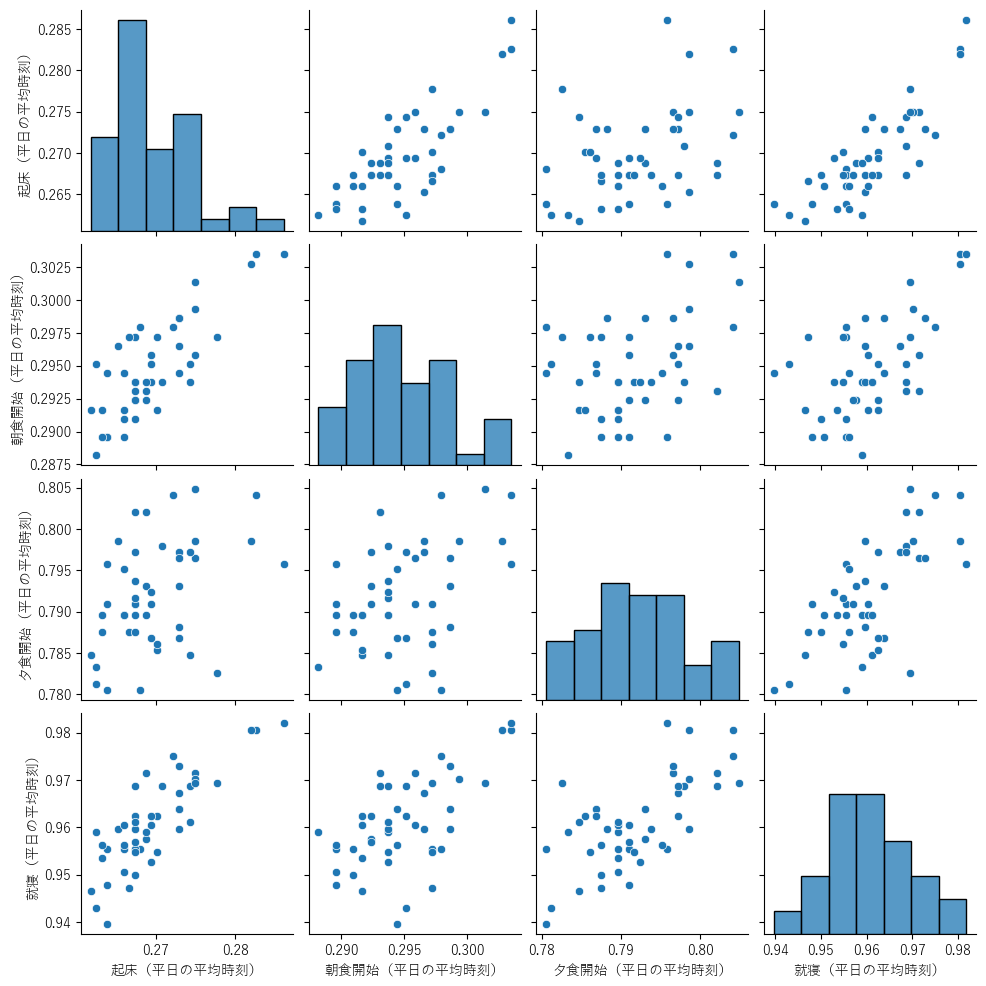

In [6]:
sns.pairplot(X_df)

# 複数クラスタ数による学習の実行


In [7]:
from sklearn.cluster import KMeans

# クラスタリングの実行履歴を保存する辞書の定義
# 学習済みモデルを格納
models = {}
# クラスタリング結果を格納
results = {}
# 目的変数(クラスタ内の合計誤差)を格納
inertias = {}

# データの2次元配列を取得

# クラスタ数kを2から10まで変化させる
for k in range(2,11):
    # クラスタリングを行うk-meansモデルを定義
    clustering = KMeans(n_clusters=k, init="random",n_init=10, random_state=256)
    # k-meansモデルを学習させ、同時にクラスタリング結果(各行に割り振られたクラスタ番号)を取得
    result = clustering.fit_predict(X_df)

    # 各種変数を辞書に保存
    models[k] = clustering
    results[k] = result
    inertias[k] = clustering.inertia_

c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is k

# エルボー法によるクラスタ数の検討

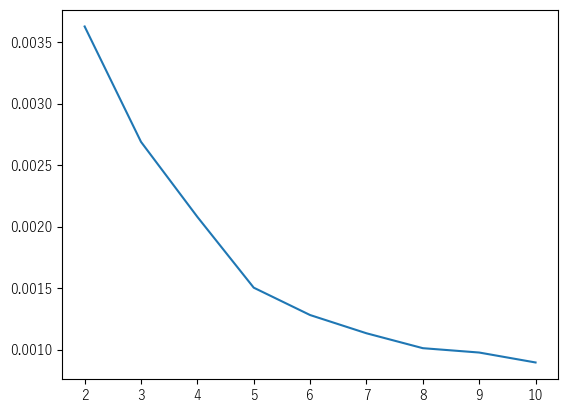

In [8]:
#クラスタ数ごとの目的変数を確認
plt.plot(inertias.keys(), inertias.values())
plt.show()

# クラスタリング結果の取得

変化が鈍くなるクラスタ数は5だと判断。クラスタ数を５に決定。

In [9]:
n_cluster = 5
# クラスタ数が5の時のクラスタリング結果を新しい列として追加
X_df["cluster"] = results[n_cluster].astype(str)
X_df

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,cluster
都道府県,,,,,
北海道,0.268056,0.297917,0.780556,0.955556,3
青森県,0.262500,0.295139,0.781250,0.943056,0
岩手県,0.261806,0.291667,0.784722,0.946528,0
宮城県,0.267361,0.297222,0.790972,0.955556,4
秋田県,0.263889,0.294444,0.780556,0.939583,0
山形県,0.266667,0.297222,0.787500,0.947222,0
福島県,0.263889,0.289583,0.790972,0.947917,0
茨城県,0.267361,0.292361,0.797222,0.962500,4
栃木県,0.263889,0.289583,0.795833,0.955556,4


# クラスタリング結果の確認

c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ranza\miniconda3\envs\ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

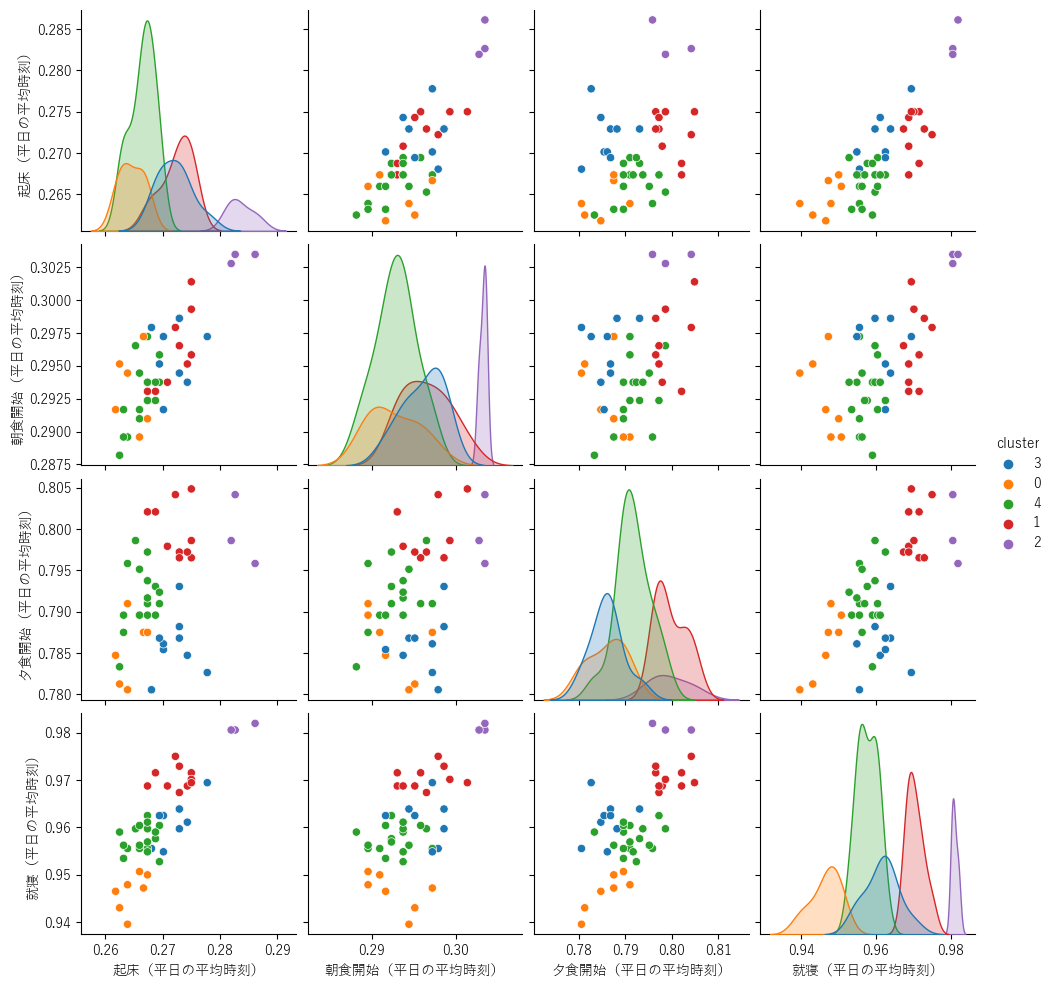

In [10]:
sns.pairplot(X_df, hue="cluster")
plt.savefig("output/SSDSE_n5.png")

In [11]:
#行動の平均時間の平均が遅いクラスタの確認
X_df.query("cluster == '2'")

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,cluster
都道府県,,,,,
東京都,0.282639,0.303472,0.804167,0.980556,2
京都府,0.286111,0.303472,0.795833,0.981944,2
大阪府,0.281944,0.302778,0.798611,0.980556,2


In [12]:
X_df.query("cluster == '1'")

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,cluster
都道府県,,,,,
埼玉県,0.268750,0.293056,0.802083,0.971528,1
千葉県,0.267361,0.293056,0.802083,0.968750,1
神奈川県,0.272222,0.297917,0.804167,0.975000,1
愛知県,0.270833,0.293750,0.797917,0.968750,1
滋賀県,0.272917,0.296528,0.797222,0.967361,1
兵庫県,0.275000,0.295833,0.796528,0.971528,1
奈良県,0.272917,0.298611,0.796528,0.972917,1
広島県,0.274306,0.295139,0.797222,0.968750,1
福岡県,0.275000,0.299306,0.798611,0.970139,1


In [13]:
#行動の平均時間の平均が早いクラスタの確認
X_df.query("cluster == '0'")

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,cluster
都道府県,,,,,
青森県,0.262500,0.295139,0.781250,0.943056,0
岩手県,0.261806,0.291667,0.784722,0.946528,0
秋田県,0.263889,0.294444,0.780556,0.939583,0
山形県,0.266667,0.297222,0.787500,0.947222,0
福島県,0.263889,0.289583,0.790972,0.947917,0
新潟県,0.265972,0.289583,0.789583,0.950694,0
宮崎県,0.267361,0.290972,0.787500,0.950000,0


In [14]:
X_df.query("cluster == '4'")

,起床（平日の平均時刻）,朝食開始（平日の平均時刻）,夕食開始（平日の平均時刻）,就寝（平日の平均時刻）,cluster
都道府県,,,,,
宮城県,0.267361,0.297222,0.790972,0.955556,4
茨城県,0.267361,0.292361,0.797222,0.962500,4
栃木県,0.263889,0.289583,0.795833,0.955556,4
群馬県,0.268750,0.292361,0.793056,0.957639,4
富山県,0.263194,0.291667,0.789583,0.953472,4
石川県,0.265278,0.296528,0.798611,0.959722,4
福井県,0.265972,0.290972,0.789583,0.955556,4
山梨県,0.269444,0.295833,0.790972,0.960417,4
長野県,0.267361,0.292361,0.790972,0.956944,4


### 分析結果を元に考察
全体的に行動の平均時間の平均が遅いクラスタは東京,京都,大阪など首都圏の県が多く含まれている。
一方、平均時刻が遅いクラスタを確認した結果、東北地方の県など、地方の県が多く含まれていた。  
このことから、首都圏では行動の平均時刻が遅く、地方では行動の平均時刻が早いことが予想できる。

In [15]:
#結果の出力
X_df.to_csv("output/SSDSE_n5.csv",encoding="utf-8")
